In [ ]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("DailyDelhiClimateTrain.csv",parse_dates=['date'],index_col="date")
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667
2013-01-04,8.667,71.333,1.233,1017.167
2013-01-05,6.000,86.833,3.700,1016.500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [ ]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000,1462.000,1462.000,1462.000
mean,25.496,60.772,6.802,1011.105
std,7.348,16.770,4.562,180.232
min,6.000,13.429,0.000,-3.042
25%,18.857,50.375,3.475,1001.580
50%,27.714,62.625,6.222,1008.563
75%,31.306,72.219,9.238,1014.945
max,38.714,100.000,42.220,7679.333


In [ ]:
# creating new features for EDA

df["year"] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df["date"] = df.index.date

df.head()

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,date
date,,,,,,,,,
2013-01-01,10.000,84.500,0.000,1015.667,2013,1,1,1,2013-01-01
2013-01-02,7.400,92.000,2.980,1017.800,2013,1,2,2,2013-01-02
2013-01-03,7.167,87.000,4.633,1018.667,2013,1,3,3,2013-01-03
2013-01-04,8.667,71.333,1.233,1017.167,2013,1,4,4,2013-01-04
2013-01-05,6.000,86.833,3.700,1016.500,2013,1,5,5,2013-01-05


In [ ]:
# creating dark gray template(xgridoff_dark) from xgridoff template:

import plotly.io as pio

# Get the 'xgridoff' template
xgridoff_template = pio.templates['xgridoff']

# Customize the template for dark mode
xgridoff_template.layout.paper_bgcolor = 'rgb(25, 25, 25)'  # very dark gray background
xgridoff_template.layout.plot_bgcolor = 'rgb(35, 35, 35)'  # Dark gray plot background

xgridoff_template.layout.font.color = 'lightgray'  # Light gray font color

# Adjust gridline color and width
xgridoff_template.layout.xaxis.gridcolor = 'rgba(200, 200, 200, 0.3)'  # Light gray with transparency
xgridoff_template.layout.yaxis.gridcolor = 'rgba(200, 200, 200, 0.3)'  # Light gray with transparency
xgridoff_template.layout.xaxis.gridwidth = 1  # Set gridline width
xgridoff_template.layout.yaxis.gridwidth = 1  # Set gridline width

# Update Plotly templates with the modified 'xgridoff' template
pio.templates['xgridoff_dark'] = xgridoff_template

Plotting features over time (daily):

In [ ]:
fig_meantemp = px.line(df, x=df.index, y='meantemp', title='Mean Temperature Over Time')
fig_meantemp.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_meantemp.show()

fig_humidity = px.line(df, x=df.index, y='humidity', title='Humidity Over Time')
fig_humidity.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_humidity.show()

fig_wind_speed = px.line(df, x=df.index, y='wind_speed', title='Wind Speed Over Time')
fig_wind_speed.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_wind_speed.show()

fig_meanpressure = px.line(df, x=df.index, y='meanpressure', title='Mean Pressure Over Time')
fig_meanpressure.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_meanpressure.show()

### Plotting Seasonal Decompositions with plotly:

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.subplots as sp

# Perform seasonal decomposition
result = seasonal_decompose(df['meantemp'], model='additive', period=365)

# Plot the decomposed components
fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True,
                       subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual'])

fig.add_trace(go.Scatter(x=df.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

fig.update_layout(template= 'xgridoff_dark',height=800, title='Seasonal Decomposition of Mean Temperature')
fig.show()

### Alternative Seasonal Decomposition plot

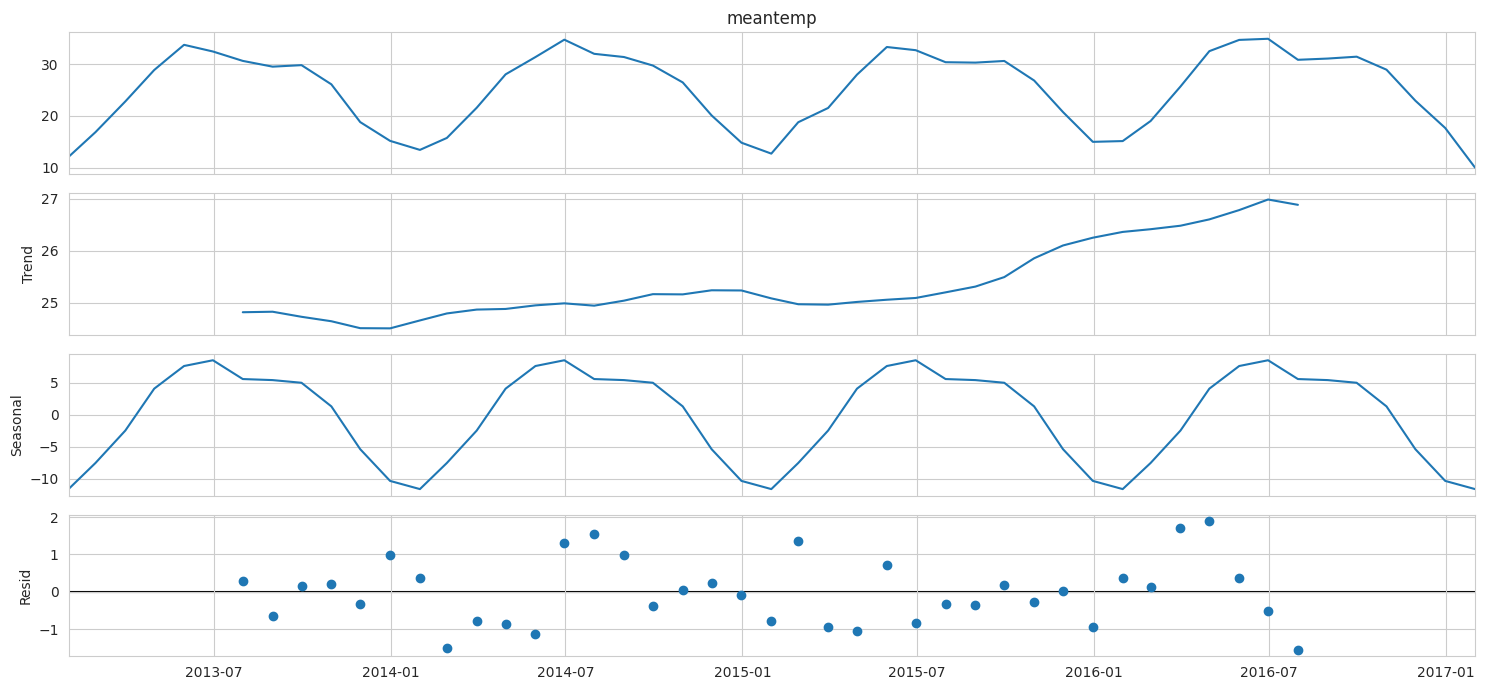

In [ ]:
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [15, 7]

# Select the 'meantemp' column and resample it to monthly frequency
data_monthly = df['meantemp'].resample('M').mean()

# Perform seasonal decomposition for 'meantemp' feature
decomposition = sm.tsa.seasonal_decompose(data_monthly)

# Plot the decomposition
fig = decomposition.plot()
plt.show()

### Plotting Features over time (Month):

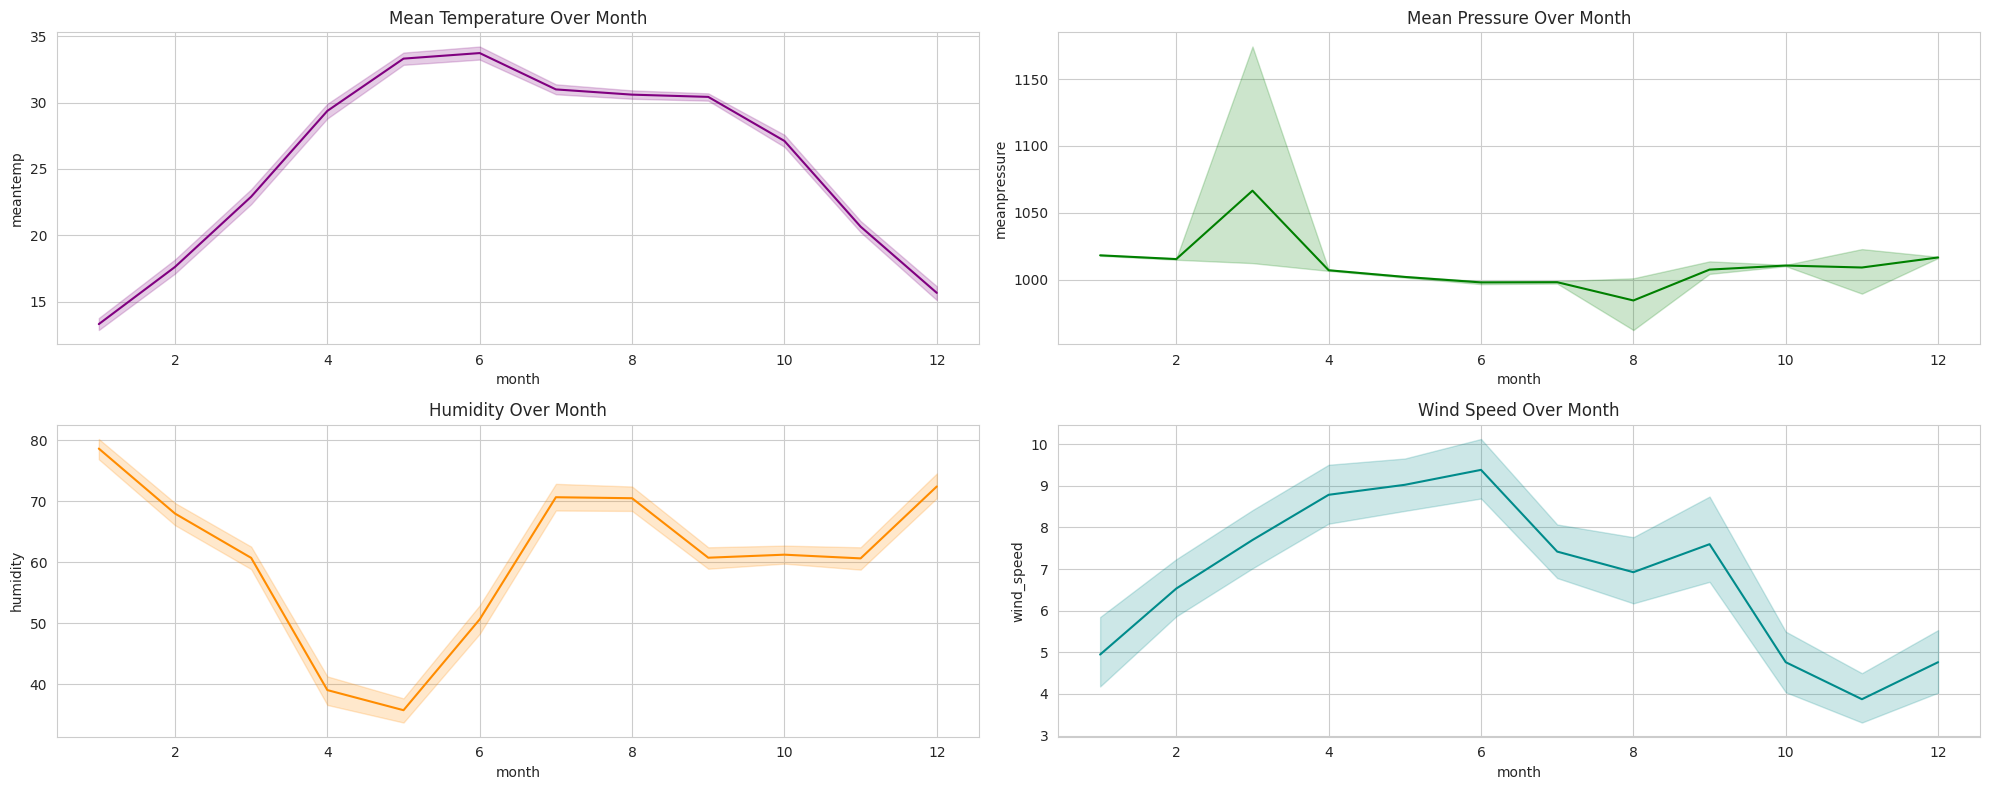

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.set_style('darkgrid')

# Plot each parameter against the 'month'
sns.lineplot(x='month', y='meantemp', data=df, color='purple', ax=axes[0][0])
axes[0][0].set_title('Mean Temperature Over Month')

sns.lineplot(x='month', y='humidity', data=df, color='darkorange', ax=axes[1][0])
axes[1][0].set_title('Humidity Over Month')

sns.lineplot(x='month', y='meanpressure', data=df, color='green', ax=axes[0][1])
axes[0][1].set_title('Mean Pressure Over Month')

sns.lineplot(x='month', y='wind_speed', data=df, color='darkcyan', ax=axes[1][1])
axes[1][1].set_title('Wind Speed Over Month')

plt.tight_layout()
plt.show()

### Plotting temprature over the years by month:

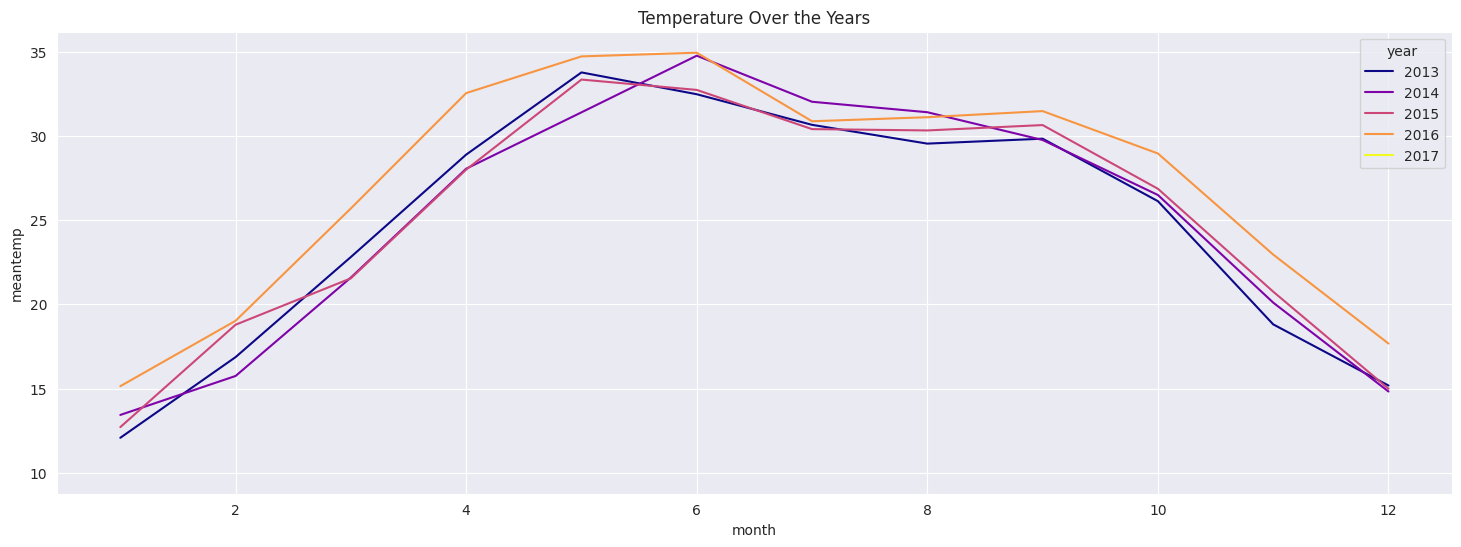

In [ ]:
plt.figure(figsize=(18, 6))

sns.set_style('darkgrid')

plt.title("Temperature Over the Years")
sns.lineplot(data=df, x='month', y='meantemp', hue='year', palette='plasma', ci= None);

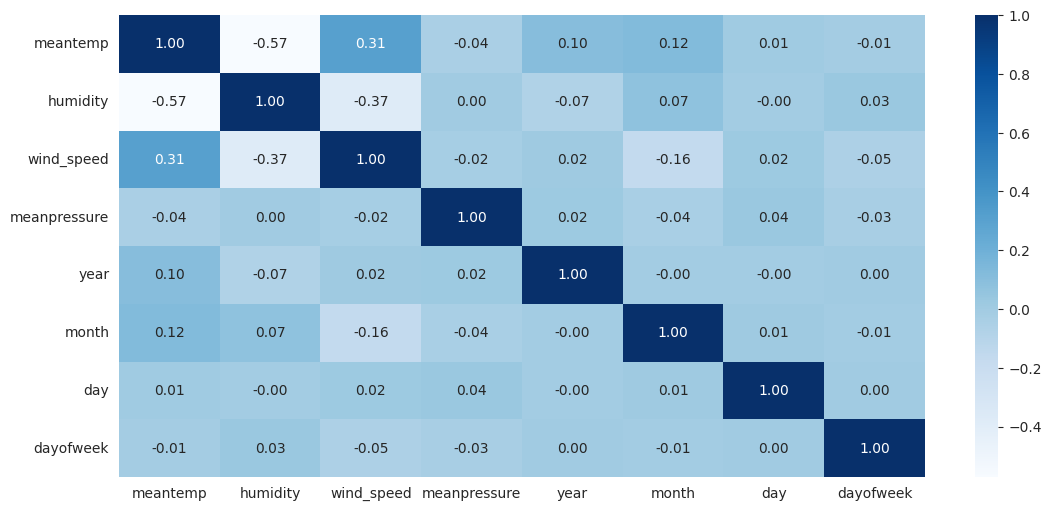

In [ ]:
plt.figure(figsize=(13, 6))

sns.heatmap(df.select_dtypes('number').corr(), cmap='Blues', annot=True, fmt='.2f');

### Monthly Distributions of features:

In [ ]:
fig = px.box(df, x='month', y='meantemp', title='Monthly Distribution of Mean Temperatures', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='humidity', title='Monthly Distribution of Mean Humidity', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='wind_speed', title='Monthly Distribution of Mean wind_speed', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='meanpressure', title='Monthly Distribution of Mean Pressure', template='xgridoff_dark')
fig.show()

### Histogram with plotly (toggle between plots from the upper right corner):

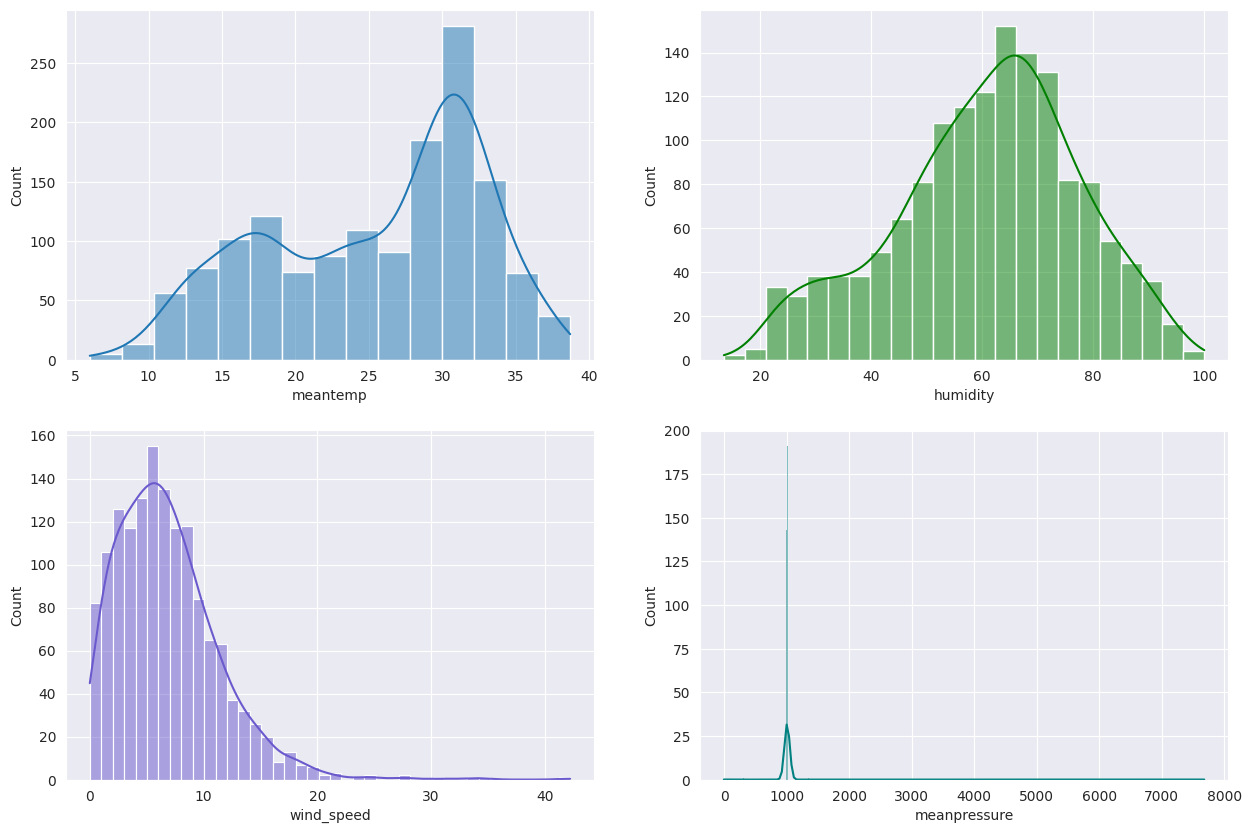

In [ ]:
sns.set_style('darkgrid')

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms with KDE
sns.histplot(data=df, x="meantemp", ax=ax[0][0], kde=True)

sns.histplot(data=df, x="humidity", ax=ax[0][1], kde=True, color='green')

sns.histplot(data=df, x="wind_speed", ax=ax[1][0], kde=True, color='slateblue')

sns.histplot(data=df, x="meanpressure", ax=ax[1][1], kde=True, color='teal')

# Show the plot
plt.show()

### Feature Selection:

In [ ]:
df = df[['meantemp', 'humidity', 'wind_speed']]
df.head()

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000,84.500,0.000
2013-01-02,7.400,92.000,2.980
2013-01-03,7.167,87.000,4.633
2013-01-04,8.667,71.333,1.233
2013-01-05,6.000,86.833,3.700


In [ ]:
#Create copy for ARIMA-SARIMA
df1 = df.copy()
df1

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000,84.500,0.000
2013-01-02,7.400,92.000,2.980
2013-01-03,7.167,87.000,4.633
2013-01-04,8.667,71.333,1.233
2013-01-05,6.000,86.833,3.700
...,...,...,...
2016-12-28,17.217,68.043,3.548
2016-12-29,15.238,87.857,6.000
2016-12-30,14.095,89.667,6.267


Steps for building ARIMA-SARIMA models:¶
1. Check Stationarity:
Verify the stationarity of each series using tests like ADF (Augmented Dickey-Fuller) and KPSS (Kwiatkowski-Phillips-Schmidt-Shin). Display with ACF and PACF plots.

2. Make Series Stationary:
Apply transformations to make the target and exogenous variables stationary if needed. Common methods include differencing and log transformations.

3. Model the Relationship:
Use the stationary series in your ARIMA or SARIMA model.

For ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal AutoRegressive Integrated Moving Average) models, it is essential to make the time series data stationary before fitting the model. These models assume that the time series data is stationary, meaning that its statistical properties such as mean, variance, and autocorrelation structure do not change over time. If the data is non-stationary, it can lead to biased parameter estimates and unreliable forecasts.

To make the data stationary, you typically need to remove trends and seasonality. This can be done through techniques like taking differences (for removing trends) and seasonal differencing (for removing seasonality). Once the data is stationary, you can then fit the ARIMA or SARIMA model to the transformed data.

In [ ]:
# Split the data into training and testing sets
train_size = int(len(df1) * 0.8)
train, test = df1.iloc[:train_size], df1.iloc[train_size:]

In [ ]:
display(f'Train shape: {train.shape}')
display(train.head())

display(f'Test shape: {test.shape}')
test.head()

'Train shape: (1169, 3)'

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000,84.500,0.000
2013-01-02,7.400,92.000,2.980
2013-01-03,7.167,87.000,4.633
2013-01-04,8.667,71.333,1.233
2013-01-05,6.000,86.833,3.700


'Test shape: (293, 3)'

,meantemp,humidity,wind_speed
date,,,
2016-03-15,24.067,58.933,8.647
2016-03-16,23.938,53.750,10.881
2016-03-17,26.312,50.312,6.844
2016-03-18,26.188,61.250,6.713
2016-03-19,26.786,61.857,3.579


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Test MSE: 65.649


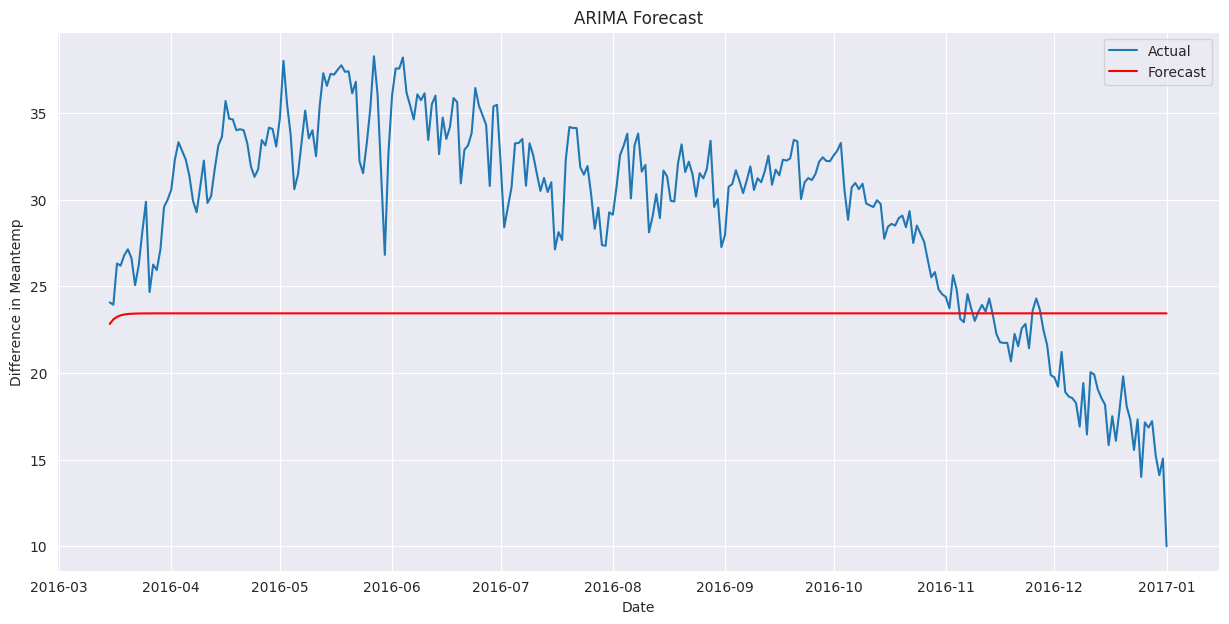

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fit the ARIMA model
arima_model = ARIMA(train['meantemp'], order=(1,1,1))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

# Make predictions
arima_pred = arima_model_fit.forecast(steps=len(test))

# Calculate error
error = mean_squared_error(test['meantemp'], arima_pred)
print('Test MSE: %.3f' % error)

# Plot the results
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, arima_pred, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Meantemp')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 42.816292335918604
Test R²: -0.337


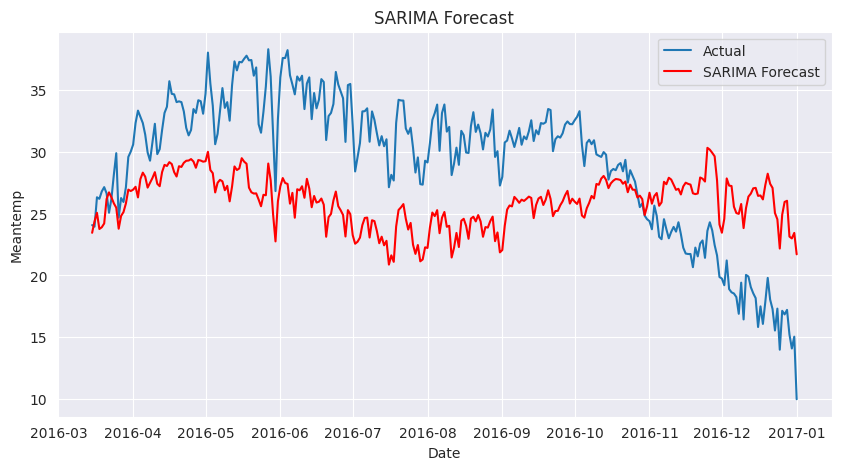

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
order = (1, 1, 6)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 7)  # Seasonal order (P, D, Q, S)

# Fit the SARIMA model
sarima_model = SARIMAX(endog=train['meantemp'], exog=train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                            exog=test[['humidity', 'wind_speed']])

# Calculate error
mse = mean_squared_error(test['meantemp'], sarima_pred)
r2 = r2_score(test['meantemp'], sarima_pred)
print('Test MSE:', mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, sarima_pred, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 23.101728563026803
Test R²: 0.278


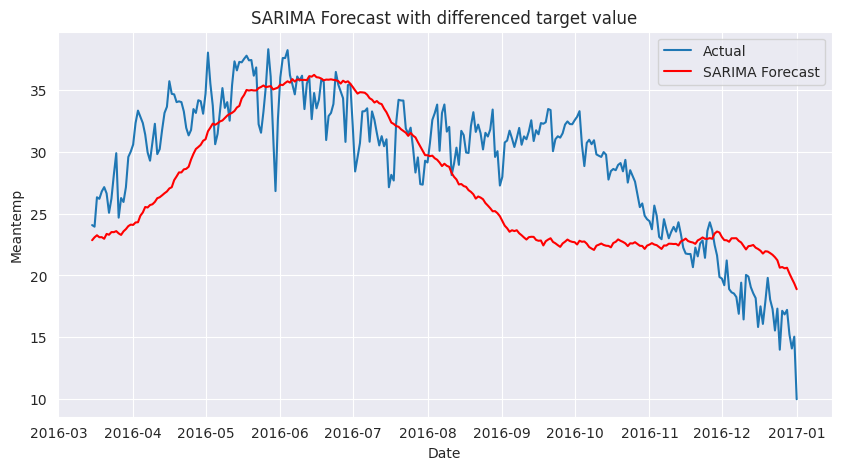